In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
## 데이터의 컬럼 이름이 들어있는 텍스트 파일을 가져와서 읽음
url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/features.txt'

feature_name_df = pd.read_csv(url, sep = '\s+', header = None, 
                              names = ['column_index', 'column_name'])

feature_name_df.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [5]:
feature_name = feature_name_df.iloc[:,1].values.tolist()
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [7]:
x_tr_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/X_train.txt'
x_t_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/X_test.txt'

x_tr = pd.read_csv(x_tr_url, sep ='\s+',header = None)
x_t = pd.read_csv(x_t_url, sep ='\s+',header = None)

In [11]:
x_tr.columns = feature_name
x_t.columns = feature_name
x_tr.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [20]:
y_tr_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/y_train.txt'
y_t_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/y_test.txt'

y_tr = pd.read_csv(y_tr_url, sep ='\s+',header = None, names= ['action'])
y_t = pd.read_csv(y_t_url, sep ='\s+',header = None, names = ['action'])

In [21]:
x_tr.shape, y_tr.shape , x_t.shape, y_t.shape

((7352, 561), (7352, 1), (2947, 561), (2947, 1))

In [22]:
y_tr.head()

,action
0,5
1,5
2,5
3,5
4,5


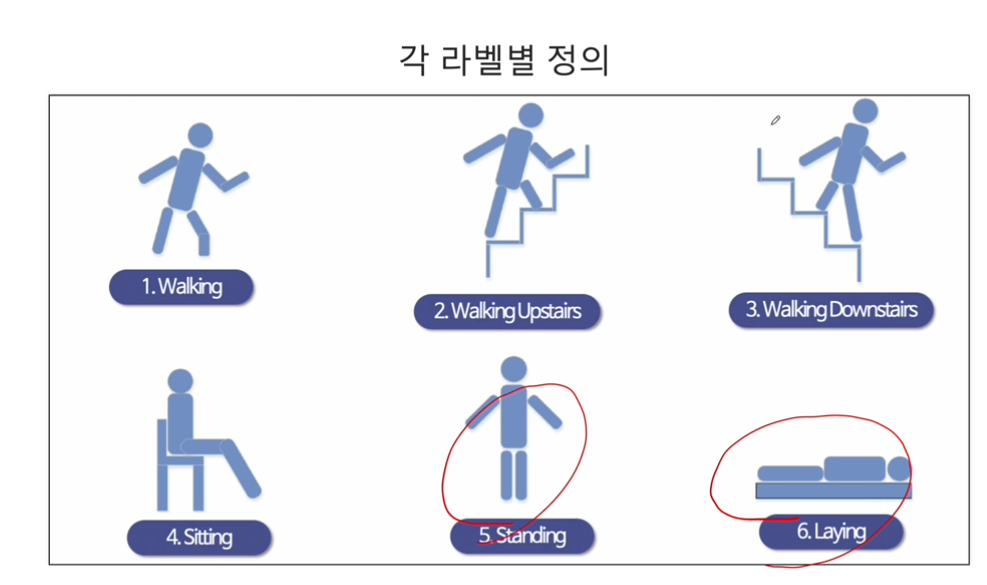

In [23]:
y_tr['action'].value_counts()

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(random_state= 0xC0FFEE, max_depth=4)
clf.fit(x_tr, y_tr)


DecisionTreeClassifier(max_depth=4, random_state=12648430)

In [27]:
y_pred = clf.predict(x_t)
acc = accuracy_score(y_t,y_pred)

print(acc)

0.8096369189005769


---
### Max depth 를 다양하게 하기 위해 GridSearchCV 사용

In [31]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [6,8,10,12,16,20,24]
          }

grid_cv = GridSearchCV(clf, param_grid=params, scoring = 'accuracy', cv=5, return_train_score= True)

grid_cv.fit(x_tr, y_tr)


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4,
                                              random_state=12648430),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [32]:
grid_cv.best_score_

0.8571893801708311

In [33]:
grid_cv.best_params_

{'max_depth': 8}

In [34]:
grid_cv.cv_results_

{'mean_fit_time': array([3.0627573 , 4.04931092, 4.72717996, 5.31221304, 5.94160848,
        6.15131941, 5.999512  ]),
 'std_fit_time': array([0.05048141, 0.14129573, 0.11976304, 0.26309576, 0.42828963,
        0.51233074, 0.54369319]),
 'mean_score_time': array([0.00699267, 0.00660772, 0.00643525, 0.00591269, 0.00577216,
        0.00740376, 0.00679669]),
 'std_score_time': array([0.00047872, 0.00156528, 0.00077675, 0.00059293, 0.00051679,
        0.00162615, 0.00070591]),
 'param_max_depth': masked_array(data=[6, 8, 10, 12, 16, 20, 24],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 6},
  {'max_depth': 8},
  {'max_depth': 10},
  {'max_depth': 12},
  {'max_depth': 16},
  {'max_depth': 20},
  {'max_depth': 24}],
 'split0_test_score': array([0.81305235, 0.82868797, 0.80353501, 0.78314072, 0.79197825,
        0.7960571 , 0.7960571 ]),
 'split1_test_score': array([0.86879674, 0.82936778, 0.

In [35]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [36]:
cv_results_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]
# max depth가 8일 경우 train과 test 둘 다 최고 점수가 나온다.
# 여기서 test는 실제 test데이터가 아니라 cross-validation의 validation data이다.

,param_max_depth,mean_test_score,mean_train_score
0,6,0.848343,0.944879
1,8,0.857189,0.982692
2,10,0.854747,0.993403
3,12,0.843456,0.997212
4,16,0.849985,0.999660
5,20,0.847264,0.999966
6,24,0.847264,1.000000


In [37]:
max_depth = [6,8,10,12,16,20,24]

for depth in max_depth:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0xC0FFEE)
    clf.fit(x_tr, y_tr)
    y_pred = clf.predict(x_t)

    print(f'Max_depth: {depth},  acc:{accuracy_score(y_t, y_pred)}')
#실제 test data에서도 depth 가 8일때 가장 점수가 좋음.

Max_depth: 6,  acc:0.8544282321004412
Max_depth: 8,  acc:0.8734306073973532
Max_depth: 10,  acc:0.8635900916185952
Max_depth: 12,  acc:0.8652867322701052
Max_depth: 16,  acc:0.8625721072276892
Max_depth: 20,  acc:0.8574821852731591
Max_depth: 24,  acc:0.8574821852731591


In [39]:
best_dt_clf = grid_cv.best_estimator_
pred1 = best_dt_clf.predict(x_t)

accuracy_score(y_t,pred1)

0.8734306073973532

---
### HAR data Random Forest 적용


In [44]:
from sklearn.ensemble import RandomForestClassifier

params = {'max_depth': [6,8,10],
          'n_estimators': [50,100,200], # 나무 몇그루 쓸건지 의미
          'min_samples_leaf': [8,12],
          'min_samples_split' : [8,12]}

In [45]:
rf_clf = RandomForestClassifier(n_jobs = -1,random_state= 0xC0FFEE) #n_jobs는 cpu core를 몇 개 쓸건가이고, -1인 경우 다 쓰라는 얘기임.
grid_cv = GridSearchCV(rf_clf, param_grid= params, n_jobs = -1)
grid_cv.fit(x_tr,y_tr)

c:\Users\bigdata\anaconda3\envs\ds_study\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=12648430),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200]})

In [46]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [47]:
target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators','param_max_depth']
cv_results_df[target_col].sort_values('rank_test_score').head()

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
35,1,0.925059,200,10
32,1,0.925059,200,10
33,3,0.925059,50,10
30,3,0.925059,50,10
26,5,0.924243,200,10


In [49]:
grid_cv.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=12, min_samples_split=8,
                       n_estimators=200, n_jobs=-1, random_state=12648430)

In [51]:
grid_cv.best_score_

0.9250587087316233

In [52]:
rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(x_tr,y_tr)

c:\Users\bigdata\anaconda3\envs\ds_study\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=10, min_samples_leaf=12, min_samples_split=8,
                       n_estimators=200, n_jobs=-1, random_state=12648430)

In [53]:
pred = rf_clf_best.predict(x_t)

accuracy_score(y_t,pred)

0.9212758737699356

---
### HAR data 중요 특성 추출
- 과연 561개나 되는 feature들을 다 써야하는가? 에대한 조사

In [67]:
best_cols_values = rf_clf_best.feature_importances_ #feature 전체에 대해서 중요도를 
best_cols = pd.DataFrame(best_cols_values, index = x_tr.columns)
top20 = best_cols.sort_values(by = 0,ascending=False)[:20]

<Axes: xlabel='0'>

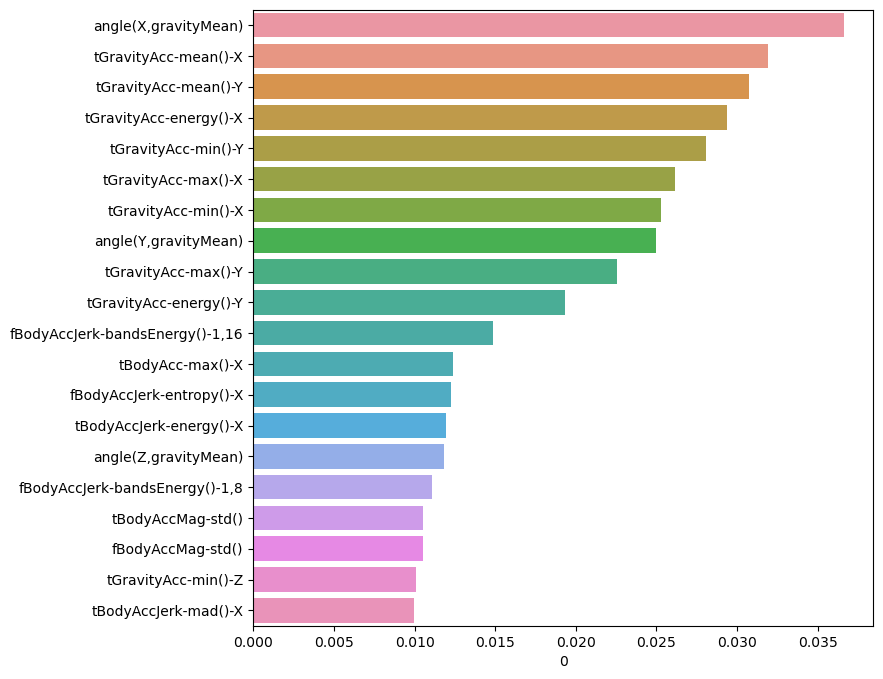

In [71]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.barplot(data = top20,x = 0, y = top20.index)

In [72]:
top20.index

Index(['angle(X,gravityMean)', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y',
       'tGravityAcc-energy()-X', 'tGravityAcc-min()-Y', 'tGravityAcc-max()-X',
       'tGravityAcc-min()-X', 'angle(Y,gravityMean)', 'tGravityAcc-max()-Y',
       'tGravityAcc-energy()-Y', 'fBodyAccJerk-bandsEnergy()-1,16',
       'tBodyAcc-max()-X', 'fBodyAccJerk-entropy()-X',
       'tBodyAccJerk-energy()-X', 'angle(Z,gravityMean)',
       'fBodyAccJerk-bandsEnergy()-1,8', 'tBodyAccMag-std()',
       'fBodyAccMag-std()', 'tGravityAcc-min()-Z', 'tBodyAccJerk-mad()-X'],
      dtype='object')

In [73]:
x_tr_re = x_tr[top20.index]
x_t_re = x_t[top20.index]

In [76]:
rf_clf_best_re = grid_cv.best_estimator_
rf_clf_best_re.fit(x_tr_re,y_tr.values.reshape(-1,))

pred1_re = rf_clf_best_re.predict(x_t_re)
accuracy_score(y_t,pred1_re)

# ACC score가 떨어졌더라도 561개의 특성보다 20개의 특성만 보면 연산속도가 빠를 것 이다. 라는 결론

0.7991177468612148